In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import math
from pathlib import Path
import os
import datetime

In [74]:
#read in light curves as a file list
read_path = Path('./RZ Cep/All_RZ_Cep/Light Curve CSVs/')
file_list = [f for f in os.listdir(read_path)if f.endswith('_1.csv')]

#read in first curve separately
df_first_obs = pd.read_csv('./RZ Cep/All_RZ_Cep/Light Curve CSVs/2022_12_07_normalised_curve_1.csv')
#define name of datetime column
date_time_col = 'date_time'

#define sexpected period as a fraction of days
period_day_frac = 0.30868

In [75]:
df_first_obs

,Unnamed: 0,corrected_magnitude,magnitude_error,date_time,ap_counts,an_counts,sky_sub,radius
0,0,-13.717229,0.120318,2022-12-07 20:21:36.898,NaN,NaN,NaN,NaN
1,1,-13.784462,0.156801,2022-12-07 20:23:10.168,NaN,NaN,NaN,NaN
2,2,-13.763017,0.111304,2022-12-07 20:26:47.376,NaN,NaN,NaN,NaN
3,3,-13.735028,0.129950,2022-12-07 20:28:17.576,NaN,NaN,NaN,NaN
4,4,-13.804809,0.129200,2022-12-07 20:31:55.369,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
152,152,-13.587631,0.030323,2022-12-08 03:26:24.390,NaN,NaN,NaN,NaN
153,153,-13.497649,0.063450,2022-12-08 03:27:56.264,NaN,NaN,NaN,NaN
154,154,-13.483720,0.070212,2022-12-08 03:31:34.398,NaN,NaN,NaN,NaN
155,155,-13.570309,0.062149,2022-12-08 03:33:04.554,NaN,NaN,NaN,NaN


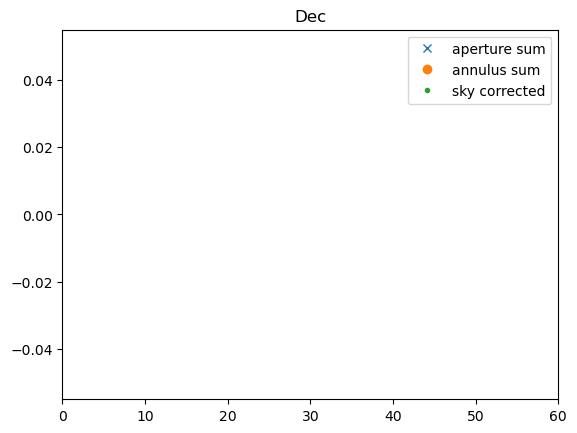

In [76]:
plt.plot(df_first_obs['radius'], df_first_obs['ap_counts'], marker = 'x', ls='None', label='aperture sum')
plt.plot(df_first_obs['radius'], df_first_obs['an_counts'], marker='o', ls='None', label='annulus sum')
plt.plot(df_first_obs['radius'], df_first_obs['sky_sub'], marker='.', ls='None', label='sky corrected')
plt.title('Dec')
plt.xlim(0, 60)
plt.legend()
plt.show()

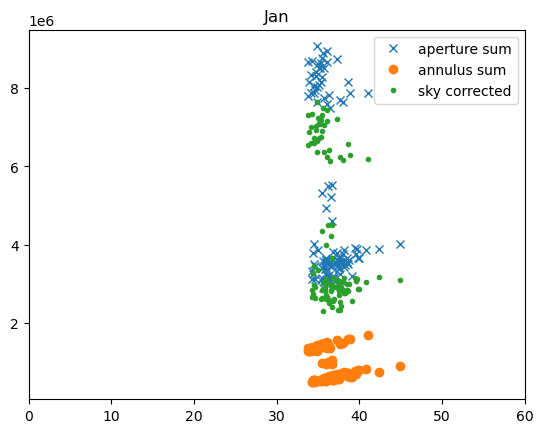

In [39]:
df_jan_23 = pd.read_csv(read_path / file_list[1])

plt.plot(df_jan_23['radius'], df_jan_23['ap_counts'], marker = 'x', ls='None', label='aperture sum')
plt.plot(df_jan_23['radius'], df_jan_23['an_counts'], marker='o', ls='None', label='annulus sum')
plt.plot(df_jan_23['radius'], df_jan_23['sky_sub'], marker='.', ls='None', label='sky corrected')
plt.title('Jan')
plt.xlim(0, 60)
plt.legend()
plt.show()

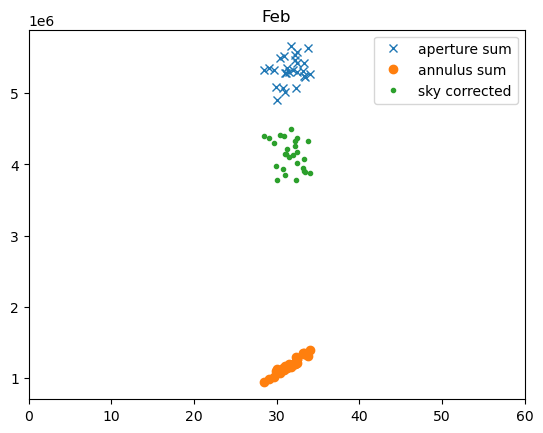

In [40]:
df_feb_23 = pd.read_csv(read_path / file_list[2])

plt.plot(df_feb_23['radius'], df_feb_23['ap_counts'], marker = 'x', ls='None', label='aperture sum')
plt.plot(df_feb_23['radius'], df_feb_23['an_counts'], marker='o', ls='None', label='annulus sum')
plt.plot(df_feb_23['radius'], df_feb_23['sky_sub'], marker='.', ls='None', label='sky corrected')
plt.title('Feb')
plt.xlim(0, 60)
plt.legend()
plt.show()

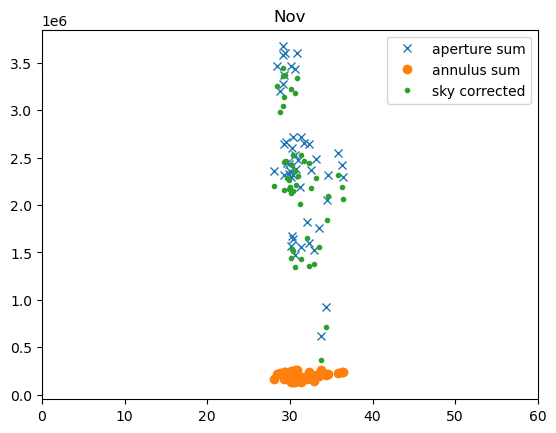

In [41]:
df_nov_23 = pd.read_csv(read_path / file_list[3])

plt.plot(df_nov_23['radius'], df_nov_23['ap_counts'], marker = 'x', ls='None', label='aperture sum')
plt.plot(df_nov_23['radius'], df_nov_23['an_counts'], marker='o', ls='None', label='annulus sum')
plt.plot(df_nov_23['radius'], df_nov_23['sky_sub'], marker='.', ls='None', label='sky corrected')
plt.title('Nov')
plt.xlim(0, 60)
plt.legend()
plt.show()

In [77]:
#convert read in time to date_time
time_first_obs = pd.to_datetime(df_first_obs[date_time_col])

#find the number of obervations in the starting night
number_times_first_obs = len(time_first_obs)
#define the starting and ending times for the first observation, along with total time change (all datetime objects)
start_time = time_first_obs[0]
end_time = time_first_obs[number_times_first_obs-1]
total_time_change = end_time - start_time
print(total_time_change)

0 days 07:15:06.521000


In [78]:
#convert period fraction into a datetime object
period_est = datetime.timedelta(days = period_day_frac)
print(period_est)
#find fraction of full star period that passes in the first observation time
fraction_of_period_first_obs = total_time_change / period_est
print(fraction_of_period_first_obs)

7:24:29.952000
0.9788739402305636


In [79]:
#convert datetimes into julian times
#function from stackexchange, user SmittySmee
def get_julian_datetime(date):
    """
    Convert a datetime object into julian float.
    Args:
        date: datetime-object of date in question

    Returns: float - Julian calculated datetime.
    Raises: 
        TypeError : Incorrect parameter type
        ValueError: Date out of range of equation
    """

    # Ensure correct format
    if not isinstance(date, datetime.datetime):
        raise TypeError('Invalid type for parameter "date" - expecting datetime')
    elif date.year < 1801 or date.year > 2099:
        raise ValueError('Datetime must be between year 1801 and 2099')

    # Perform the calculation
    julian_datetime = 367 * date.year - int((7 * (date.year + int((date.month + 9) / 12.0))) / 4.0) + int(
        (275 * date.month) / 9.0) + date.day + 1721013.5 + (
                          date.hour + date.minute / 60.0 + date.second / math.pow(60,
                                                                                  2)) / 24.0 - 0.5 * math.copysign(
        1, 100 * date.year + date.month - 190002.5) + 0.5

    return julian_datetime

In [80]:
#convert to julian times
julian_start_time = get_julian_datetime(start_time)
julian_end_time = get_julian_datetime(end_time)
julian_time_change = julian_end_time - julian_start_time
#convert julian time change into a fraction
phase_factor = fraction_of_period_first_obs / julian_time_change

phase_dec_22 = []

#iterate through times to convert into phase
for time in pd.to_datetime(df_first_obs[date_time_col]):
    #convert current time to julian time
    julian_time = get_julian_datetime(time)
    #find time since start of observation
    julian_time_since_first_obs = julian_time - julian_start_time
    

    #map the time since first observation to the phase
    phase = phase_factor * julian_time_since_first_obs
    #append new phase value to an array
    phase_dec_22.append(phase)

In [81]:
phase_jan_23 = []
df_jan_23 = pd.read_csv(read_path / file_list[1])

#iterate through times to convert into phase
for time in pd.to_datetime(df_jan_23[date_time_col]):
    #convert current time to julian time
    julian_time = get_julian_datetime(time)
    #find time since start of observation
    julian_time_since_first_obs = julian_time - julian_start_time
    

    #map the time since first observation to the phase
    phase = phase_factor * julian_time_since_first_obs
    #convert to 0 - 1
    phase = phase - np.floor(phase)
    #append new phase value to an array
    phase_jan_23.append(phase)

In [82]:
phase_feb_23 = []
df_feb_23 = pd.read_csv(read_path / file_list[2])

#iterate through times to convert into phase
for time in pd.to_datetime(df_feb_23[date_time_col]):
    #convert current time to julian time
    julian_time = get_julian_datetime(time)
    #find time since start of observation
    julian_time_since_first_obs = julian_time - julian_start_time
    

    #map the time since first observation to the phase
    phase = phase_factor * julian_time_since_first_obs
    #convert to 0 - 1
    phase = phase - np.floor(phase)
    #append new phase value to an array
    phase_feb_23.append(phase)

In [83]:
phase_nov_23 = []
df_nov_23 = pd.read_csv(read_path / file_list[3])
#drop first anomalous point
df_nov_23 = df_nov_23.iloc[1:, :]
df_nov_23.reset_index(drop=True, inplace=True)

#iterate through times to convert into phase
for time in pd.to_datetime(df_nov_23[date_time_col]):
    #convert current time to julian time
    julian_time = get_julian_datetime(time)
    #find time since start of observation
    julian_time_since_first_obs = julian_time - julian_start_time
    

    #map the time since first observation to the phase
    phase = phase_factor * julian_time_since_first_obs
    #convert to 0 - 1
    phase = phase - np.floor(phase)
    #append new phase value to an array
    phase_nov_23.append(phase)

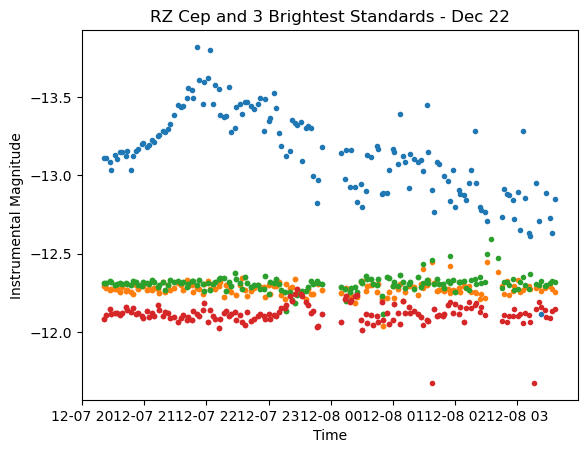

In [11]:
dec_stan_1 = pd.read_csv(read_path / 'Standards/2022_Dec_Bright_1.csv')
dec_stan_2 = pd.read_csv(read_path / 'Standards/2022_Dec_Bright_2.csv')
dec_stan_3 = pd.read_csv(read_path / 'Standards/2022_Dec_Bright_3.csv')

plt.plot(pd.to_datetime(df_first_obs['date_time']), df_first_obs['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(dec_stan_1['date_time']), dec_stan_1['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(dec_stan_2['date_time']), dec_stan_2['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(dec_stan_3['date_time']), dec_stan_3['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.gca().invert_yaxis()
plt.title('RZ Cep and 3 Brightest Standards - Dec 22')
plt.xlabel('Time')
plt.ylabel('Instrumental Magnitude')
plt.show()

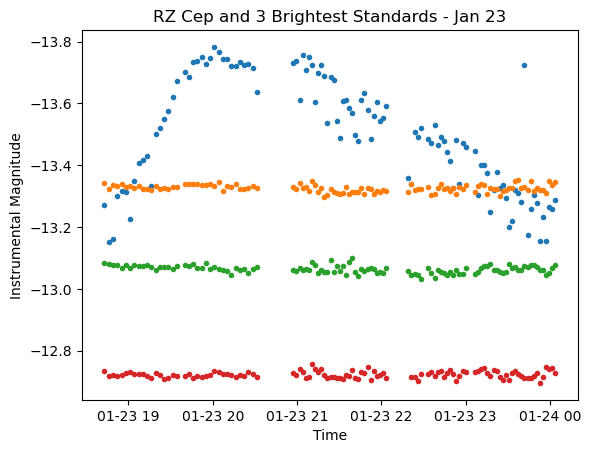

In [12]:
jan_stan_1 = pd.read_csv(read_path / 'Standards/2023_Jan_Bright_1.csv')
jan_stan_2 = pd.read_csv(read_path / 'Standards/2023_Jan_Bright_2.csv')
jan_stan_3 = pd.read_csv(read_path / 'Standards/2023_Jan_Bright_3.csv')

plt.plot(pd.to_datetime(df_jan_23['date_time']), df_jan_23['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(jan_stan_1['date_time']), jan_stan_1['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(jan_stan_2['date_time']), jan_stan_2['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(jan_stan_3['date_time']), jan_stan_3['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.gca().invert_yaxis()
plt.title('RZ Cep and 3 Brightest Standards - Jan 23')
plt.xlabel('Time')
plt.ylabel('Instrumental Magnitude')
plt.show()

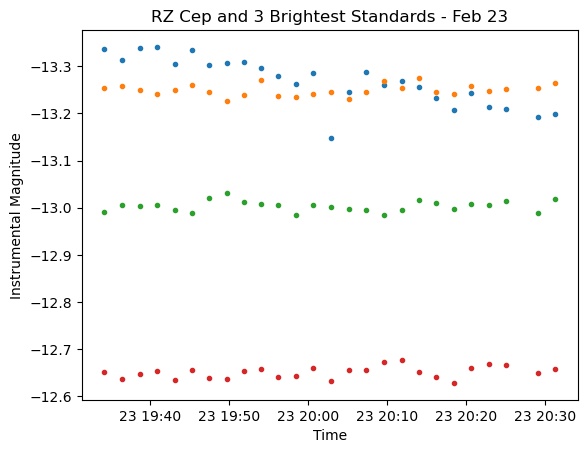

In [13]:
feb_stan_1 = pd.read_csv(read_path / 'Standards/2023_Feb_Bright_1.csv')
feb_stan_2 = pd.read_csv(read_path / 'Standards/2023_Feb_Bright_2.csv')
feb_stan_3 = pd.read_csv(read_path / 'Standards/2023_Feb_Bright_3.csv')

plt.plot(pd.to_datetime(df_feb_23['date_time']), df_feb_23['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(feb_stan_1['date_time']), feb_stan_1['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(feb_stan_2['date_time']), feb_stan_2['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(feb_stan_3['date_time']), feb_stan_3['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.gca().invert_yaxis()
plt.title('RZ Cep and 3 Brightest Standards - Feb 23')
plt.xlabel('Time')
plt.ylabel('Instrumental Magnitude')
plt.show()

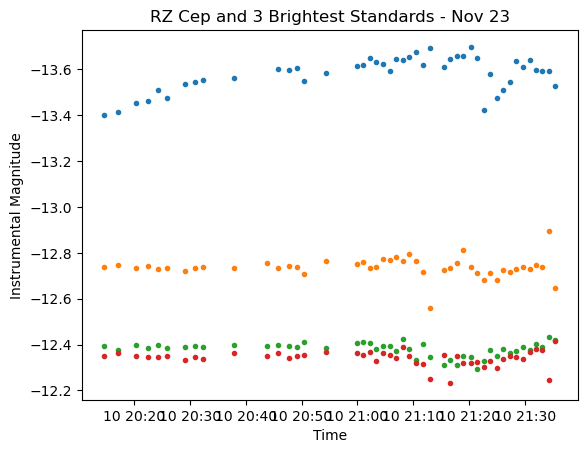

In [14]:
nov_stan_1 = pd.read_csv(read_path / 'Standards/2023_Nov_Brightest_1.csv')
nov_stan_2 = pd.read_csv(read_path / 'Standards/2023_Nov_Brightest_2.csv')
nov_stan_3 = pd.read_csv(read_path / 'Standards/2023_Nov_Brightest_3.csv')

plt.plot(pd.to_datetime(df_nov_23['date_time']), df_nov_23['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(nov_stan_1['date_time']), nov_stan_1['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(nov_stan_2['date_time']), nov_stan_2['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.plot(pd.to_datetime(nov_stan_3['date_time']), nov_stan_3['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22')
plt.gca().invert_yaxis()
plt.title('RZ Cep and 3 Brightest Standards - Nov 23')
plt.xlabel('Time')
plt.ylabel('Instrumental Magnitude')
plt.show()

0     -11.67443
1     -11.67443
2     -11.67443
3     -11.67443
4     -11.67443
         ...   
149   -11.67443
150   -11.67443
151   -11.67443
152   -11.67443
153   -11.67443
Name: corrected_magnitude, Length: 154, dtype: float64


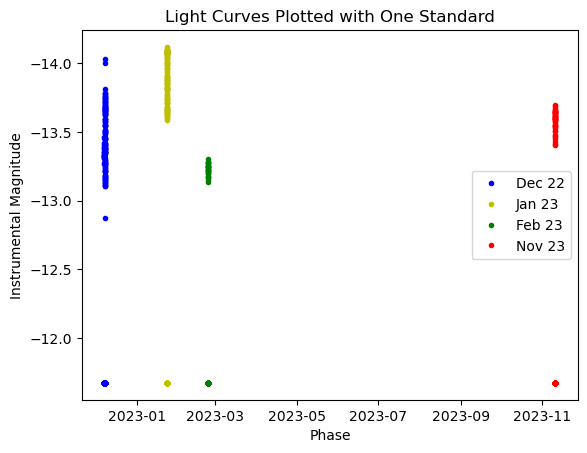

In [26]:
nov_stan = pd.read_csv(read_path / 'stan_nov.csv')
dec_stan = pd.read_csv(read_path / 'stan_dec.csv')
jan_stan = pd.read_csv(read_path / 'stan_jan.csv')
feb_stan = pd.read_csv(read_path / 'stan_feb.csv')

plt.plot(pd.to_datetime(dec_stan['date_time']), dec_stan['corrected_magnitude'], marker='.', ls='None', color='b')
plt.plot(pd.to_datetime(jan_stan['date_time']), jan_stan['corrected_magnitude'], marker='.', ls='None', color='y')
plt.plot(pd.to_datetime(feb_stan['date_time']), feb_stan['corrected_magnitude'], marker='.', ls='None', color='g')
plt.plot(pd.to_datetime(nov_stan['date_time']), nov_stan['corrected_magnitude'], marker='.', ls='None', color='r')

plt.plot(pd.to_datetime(df_first_obs['date_time']), df_first_obs['corrected_magnitude'], 
         marker='.', ls='None', label='Dec 22', color='b')
plt.plot(pd.to_datetime(df_jan_23['date_time']), df_jan_23['corrected_magnitude'], 
         marker='.', ls='None', label='Jan 23', color='y')
plt.plot(pd.to_datetime(df_feb_23['date_time']), df_feb_23['corrected_magnitude'], 
         marker='.', ls='None', label='Feb 23', color='g')
plt.plot(pd.to_datetime(df_nov_23['date_time']), df_nov_23['corrected_magnitude'], 
         marker='.', ls='None', label='Nov 23', color='r')

print(dec_stan['corrected_magnitude'])
#-12.184956
#-11.28526
plt.gca().invert_yaxis()
plt.legend()
plt.title('Light Curves Plotted with One Standard')
plt.xlabel('Phase')
plt.ylabel('Instrumental Magnitude')
plt.show()

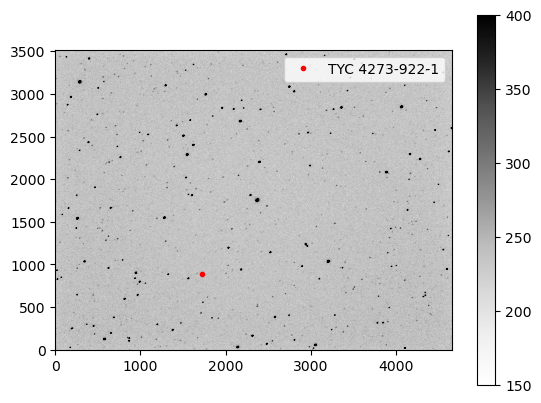

In [19]:
from astropy.nddata import CCDData
ref_im = CCDData.read(f'./RZ Cep/All_RZ_Cep/2023_01_23/RZ_Cep/Lights/Luminance Reduced/star_Light_Luminance_10_secs_001_reduced.fits')
plt.imshow(ref_im.data, cmap='Greys', vmin=150, vmax=400)
plt.gca().invert_yaxis()
#plot an x to estimate star position
plt.plot(1722, 886, marker='.', color='r', ls='None', label='TYC 4273-922-1')
plt.colorbar()
plt.legend()
plt.show()

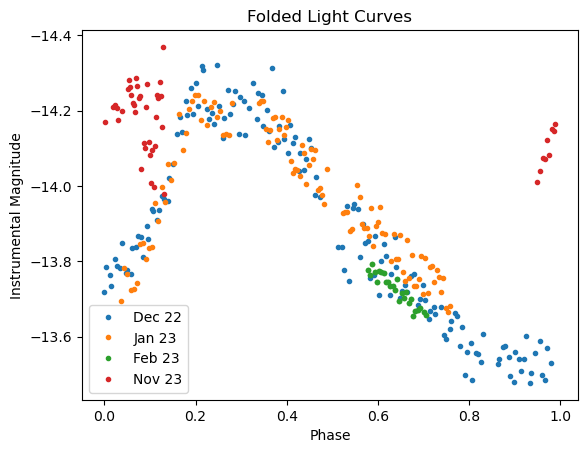

In [84]:
nov_stan = pd.read_csv(read_path / 'stan_nov.csv')
dec_stan = pd.read_csv(read_path / 'stan_dec.csv')
jan_stan = pd.read_csv(read_path / 'stan_jan.csv')
feb_stan = pd.read_csv(read_path / 'stan_feb.csv')

plt.plot(phase_dec_22, df_first_obs['corrected_magnitude'], marker='.', ls='None', label='Dec 22')
plt.plot(phase_jan_23, df_jan_23['corrected_magnitude'], marker='.', ls='None', label='Jan 23')
plt.plot(phase_feb_23, df_feb_23['corrected_magnitude'], marker='.', ls='None', label='Feb 23')
plt.plot(phase_nov_23, df_nov_23['corrected_magnitude'],marker='.', ls='None', label='Nov 23')

plt.gca().invert_yaxis()
plt.legend()
plt.title('Folded Light Curves')
plt.xlabel('Phase')
plt.ylabel('Instrumental Magnitude')
plt.show()

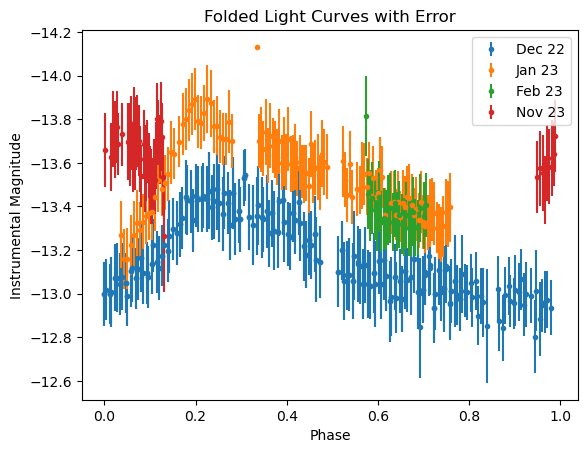

In [18]:
plt.errorbar(phase_dec_22, df_first_obs['corrected_magnitude'], yerr=df_first_obs['magnitude_error'],
          marker='.', ls='None', label='Dec 22')
plt.errorbar(phase_jan_23, df_jan_23['corrected_magnitude'], yerr=df_jan_23['magnitude_error'],
          marker='.', ls='None', label='Jan 23')
plt.errorbar(phase_feb_23, df_feb_23['corrected_magnitude'], yerr=df_feb_23['magnitude_error'],
          marker='.', ls='None', label='Feb 23')
plt.errorbar(phase_nov_23, df_nov_23['corrected_magnitude'], yerr=df_nov_23['magnitude_error'],
          marker='.', ls='None', label='Nov 23')
plt.gca().invert_yaxis()
plt.legend()
plt.title('Folded Light Curves with Error')
plt.xlabel('Phase')
plt.ylabel('Instrumental Magnitude')
plt.show()